<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/fluidcharacterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Introduction to fluid characterization
#@markdown This section gives an introdution to fluid characterization of oil and gas.
%%capture
!pip install py4j
!pip install --upgrade -q gspread
!rm -rf testneqsim
!git clone https://github.com/EvenSol/NeqSim-Colab.git
!cd NeqSim-Colab
!pip install NeqSim-Colab/lib/neqsim-*.whl
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

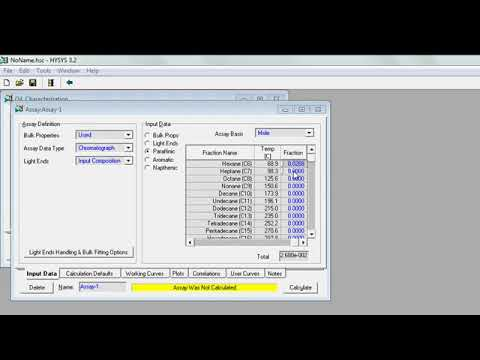

In [4]:
#@title Introduction to fluid characterization in HYSYS
#@markdown This video gives an introduction introduction to fluid characterization in HYSYS
from IPython.display import YouTubeVideo
YouTubeVideo('OEPnWpa2ikg', width=600, height=400)